<a href="https://colab.research.google.com/github/jchamilton75/CS-ST4-Cosmo-2020/blob/master/ST4_2020_Cosmology_TD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Centrale-Supélec - ST4 - Cosmology 2020 - TD2

Welcome this this second practicle work in cosmology. Today we'll start analyzing real cosmology data: Type Ia supernovae. The aim of this notebook is to reproduce by yourself the discivery of a non-zero cosmological constant that was made in 1998 and lead to the Nobel Prize in Physics for Saul Perlmutter, Brian Schmidt and Adam G. Riess.

We will address the following topics:
1.   Downloading, plotting type Ia Supernovae data (real data) and testing it against emblematic cosmological models.
2.   Fitting the best cosmological parameters to the data using direct fitting.
3.   Exploring the parameters space ussing Monte-Carlo-Markov-Chains in order to calculate accurate statistically meaningful constraints on cosmological parameters from the same data.

You will learn about:
*   Supernovae physics, Magnitudes and distance modulus that are observational quantities very commonly used in astrophysics.
*   Bayesian statistics and Monte-Carlo Markov-Chains that have become key tools in modern data analysis, especially in cosmology.



Before doing anything, we will first run the required few lines of code + the loading of the cosmolib library:

In [0]:
import sys
print("Using Python {}".format(sys.version_info[0]))

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
!pip install pymc
!pip install iminuit
!rm -rf cosmolib.py*
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
import cosmolib as cs

Using Python 3
     |████████████████████████████████| 389kB 4.9MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1275951 sha256=d2e05ccbf3edce6b5cb0f6b5bf6c46a20d8c9083d74c5bb4b154b475a8b49d12
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc
     |████████████████████████████████| 4.0MB 4.7MB/s 
--2020-05-08 19:24:40--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14518 (14K) [text/plain]
Saving to: ‘cosmolib.py’

cosmolib.py         100%[===================>]  14.18K  --.-KB/s    in 0.007s  

2020-05-08 19:24:40 (2.06 MB/s) - ‘cosmolib.py’ saved [14518/14518]



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cosmological Analysis with type Ia Supernovae
We will not detail everything related to supernovae here, but just recall a few basic elements.

## What are Supernovae ?
Supernovae are stars that "appear" in the sky suddenly and remain very bright for a few weeks up to a few months. Some historical supernovae were even visible during the day. Astronomers gradually understood that these were stars terminating their lives in a gigantic explosion. Their luminosity is typically 1 billion times larger than that of the initial star so that they are visible over cosmological distances (up to z=1 typically although a few ones are even further thanks to Hubble Space Telescope).

With the development os spectroscopic astronomy, astronomer realized that all supernovae were not spectroscopically indentical, they had different emission and absorption lines indicating very different chemical composition. Nowadays, two different mechanisms for Supernovae explosions have been recognized and the Supernova Classification is made on these mechanisms rather than on spectral features:
- The **Core Collapse** correspond to the gravitational collapse of a very massive star (therefore young as the lifetime of a star scales as the inverse of its mass to the 2.5 power). The external layers of gaz fall on the internal ones provoking a bounce and nuclear burning of the material. This is the explosion. These Supernovae are spectroscopically classified as type II, Ib or Ic depending on their spectral features.
- The **Type Ia Supernovae** correspond to the explosion of a white dwarf in a binary system in which the companion is significantly less dense and is being eaten gradually by the white dwarf's gravitational potential well. Beyond a mass of 1.44 $M_\bigodot$ (the Chandrasekhar mass) the white dwarf no longer has enough *quantum pressure* to hold the external layers. As a consequence, the external layers collapse and provoque bouncing and nuclear explosion.

## Standard Candles
Concerning type Ia supernovae, the same type of simple object explodes (a white dwarf at the Chandrasekhar Mass). One therefore expects the explosion to be very reproductible from a type Ia supernovae to another. In practice, type Ia supernovae at their maximum luminosity are indeed the best standard candles known in cosmology with a dispersion of their absolute luminosity typically 12% (after some corrections). They can therefore be used to measure distances throughout the Universe.

Using type Ia supernovae in 1997, two tems have discovered the acceleration of the expansion of the Universe, theat is usually interpreted within Friedman-Lemaître-Robertson-Walker models as the effect of a cosmological constant.

## The Union Sample 2.1
We will redo this analysis with a modern sample comprising 580 supernovae discovered and followed with 19 different telescopes. The light curves of these supernovae were deeply analysed in order to uniformize photometrically the measurements (correct for the effects of the different telescopes, filters, ...) so that the luminosity at maximum is expected to be as clean as possible. This uniformization represents a tremendous analysis effort that we will completely ignore in the following notebook.

We will be using the sample called "Union Sample 2.1" from the article by N. Suzuki et al., ApJ 746, 85 (2012), http://arxiv.org/abs/1105.3470

An even more modern and large sample is available and is called JLA (Betoule et al. 2014): http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html, you may be interested in downloading it and trying it if you want (but this is not expected for this course).

## Which observable ?
When observing a supernova, one measures its light-curve: the time evolution of its apparent luminosity, as in the following curve:
<img src="https://weareallinthegutter.files.wordpress.com/2010/12/supernova3b.jpg">
It is the luminosity at maximum that consitutes a standard candle with an absolute magnitude of $M_v=-19.3 \pm 0.12$ 

The absolute magnitude is defined by the magnitude of the object if it was located 10 parsec away:
$$ M = -2.5 \log_{10} L(10\mathrm{pc})$$

The apparent magnitude on the other hand is measured at the actual distance *d* (in parsecs):
$$ m = -2.5 \log_{10} L(d [\mathrm{pc}])$$
and the luinsoty at distance *d* is of course:
$$ L(d) = \frac{L(10)}{(d/10)^2}$$

Because we are measuring luminosities, the cosmological distance we need to use here are **luminosity distances**.
On can therefore define the **distance modulus** as:
$$\mu \equiv m-M=5\log_{10} D_L - 5$$
Which is therefore a direct logarithmic measure of the luminosity distance. This is the quantity that is used in cosmology.

For each supernova, one measures the apparent magnitude at maximum, deduce its distance modulus (which requires a lot of efforts that will be ignored here). On the other hand a measurement of the redshift of the supernova is performed using a spectrum of the object (this is the easy part - note that we have not discussed the way of **finding** supernovae which is in itlsef really difficult for they are rare objects: typically one per galaxy and per century).

The SNIa Hubble diagram is therefore the simple representation of $\mu$ as a function od $z$ and we know that this quatity directly depends upon cosmological parameters because:
$$D_L(z) = c\times(1+z)\times\int_0^z \frac{1}{H(z')}dz'$$
with
$$ H(z) = H_0\times\sqrt{\Omega_k\times(1+z)^2+\Omega_m\times(1+z)^3+\Omega_\Lambda}$$

## Important remark
The absolute luminosity of supernovae depends on the inferred distance of the supernovae used to calibrate it. It therefore depends on the Hubble constant and finally, the luminosity distance depends on the Hublle constant in the same manner, so that finally the Hubble constant value disappears in the distance modulus $m-M$. This means that supernovae are insensitive to the Hubble constant and canot be used to constrain it alone.

## Download the file from GitHub:


In [0]:
!rm -f union2.1.txt
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/Data/union2.1.txt
! ls -lrt

--2020-05-08 19:36:14--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/Data/union2.1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘union2.1.txt’

union2.1.txt        100%[===================>]  33.10K  --.-KB/s    in 0.009s  

2020-05-08 19:36:14 (3.70 MB/s) - ‘union2.1.txt’ saved [33899/33899]

total 60
drwxr-xr-x 1 root root  4096 May  4 16:26 sample_data
-rw-r--r-- 1 root root 14518 May  8 19:24 cosmolib.py
drwxr-xr-x 2 root root  4096 May  8 19:24 __pycache__
-rw-r--r-- 1 root root 33899 May  8 19:36 union2.1.txt


### Reading the file
The file, in ASCII format, is found in the Data directory. It contains 5 columns for each supernova:
- the name of the supernova
- its redshift
- its distance modulus
- the uncertainty on the distance modulus
- a quantity irrelevant here (the probablity for the SNIa to have exploded in a low mass galaxy) related to systematics.

One reads the file using the numpy "loadtxt" command which is very convenient and returns the columns we are interested in in the form of tables:

In [0]:
filename='union2.1.txt'
zsn,musn,dmusn=np.loadtxt(filename,usecols=(1,2,3),unpack=True)

Looking at the first 10 gives:

In [0]:
for i in range(10):
    print('z={0:5.3f} mu={1:6.3f} +/- {2:6.3f}'.format(zsn[i], 
                                                       musn[i], dmusn[i]))

z=0.028 mu=35.347 +/-  0.224
z=0.050 mu=36.682 +/-  0.167
z=0.053 mu=36.818 +/-  0.156
z=0.070 mu=37.447 +/-  0.158
z=0.063 mu=37.483 +/-  0.156
z=0.088 mu=38.229 +/-  0.188
z=0.079 mu=37.488 +/-  0.156
z=0.017 mu=34.654 +/-  0.199
z=0.042 mu=36.336 +/-  0.167
z=0.045 mu=36.640 +/-  0.165


Let's now plot the supernovae's distance modulus as a function of redshift including error-bars, you will use the function 'errorbar' instead of 'plot' in order to plot the error-bars as well. Also, we plot the data in Log-Log which is better in this case.

Text(0, 0.5, 'Distance Modulus')

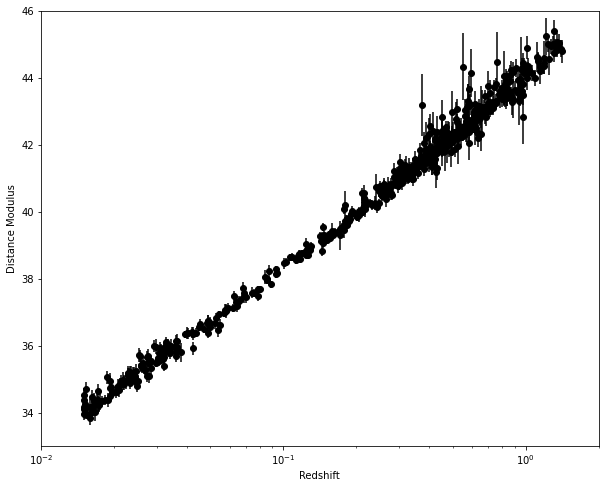

In [0]:
rc('figure',figsize=(10,8))
errorbar(zsn, musn, yerr=dmusn, fmt='ko')   
xscale('log') 
xlim(1e-2,2) 
ylim(33,46) 
xlabel('Redshift') 
ylabel('Distance Modulus')

### $\chi^2$ of each model
The most common manner to compare data and a model is to use the least-square method: one measures the value of a statistical quantity named $\chi^2$ which depends upon data, their uncertainties and the model that is tested against the data.

In fact, one can easily demonstrate that for a dataset whith Gaussian error-bars, and a model depending on a set of parameters $f(\vec{\theta})$, minimizing the $\chi^2$ with respect ot the parameters $\vec{\theta}$ allows finding the parameters which maximize the probability that the data is taken from the model with the given error-bars. This means doing a "fit" to the data, the minimum of the $\chi^2$ corresponds to the best-fit and is an unbiased and optimal estimator of $\vec{\theta}$ if the error-bars are Gaussian.

Let's assume that we have the data $\mu_i(z_i)$ with uncertainties $\sigma_i$ for $i$ going from $0$ to $N-1$, and a model $\mu_{th}(\vec{\theta}), z)$, then the $\chi^2$ writes:
$$\chi^2(\vec{\theta}) = \sum_{i=0}^{N-1} \frac{\left( \mu_i - \mu_{th}(\vec{\theta}, z_i)\right)^2}{\sigma_i^2}$$

A natural and simple interpretation of the $\chi^2$ (we will see a more rigourous one later) is the following: for each measurement, we calculate the distance of this measurement to the theoretical curve for a given set of paramters, and we take this distance in units of error-bars (therefore dividing the distance on the y-axis by the error-bar). We then take the square of this quantity because being above or under the curve makes no statistical difference (Gaussian errors). One then sums all of these quantities for each data point in order to have a global estimate of the distance of the curve to the points. It is then expected that the smaller the $\chi^2$, the better the agreement of the curve to the points. Furthermore, if the error-bars were correctly estimated and if the model does not overfit the data, each individual $\chi^2$ should be of the order 1 in average, so that the global $\chi^2$ should be of order $N$ on average (over all possible realizations). As a consequence, on top of the $\chi^2$ information, one usually gives the *number of degrees of freedom* (*ndf*) which is the number of data points minus the number of parameters that have been adjusted for this curve. If $\chi^2/ndf$ is too large this means that the model is bad or that the uncertainties were underestimated. If $\chi^2/ndf$ is too low, then it can mean that the error bars are overestimated or that the model overfits the data. The ideal value 1 is of course an average and each realisazation fluctuates around this average (with a probability distribution given by the $\chi^2$ distribution at N degrees of freedom https://en.wikipedia.org/wiki/Chi-squared_distribution).



***Question 1:*** You are now expected to overplot on the supernovae Hubble diagram the three different canonical cosmological models in three different colours, and for each model calculate the $\chi^2$ and number of degrees of freedom of the supernova data sample, which you will dispay in the legend of the plot.

The three cosmological models are of course:
- flat: $h=0.7$, $\Omega_m=1$, $\Omega_\Lambda=0$, $w=-1$
- open: $h=0.7$, $\Omega_m=0.3$, $\Omega_\Lambda=0$, $w=-1$
- lcdm: $h=0.7$, $\Omega_m=0.3$, $\Omega_\Lambda=0.7$, $w=-1$

Remember that the SNIa data is NOT luminosity ditance but distance modulus that is defined as:
$$\mu \equiv m-M=5\log_{10} D_L - 5$$
So you need to apply this formula to your luminosity distance, you can alternatively use the cs.musn1a() function that does this for you (same argumentas as cs.lumdist()).

You should see that the $\Lambda$CDM models gives a significantly better $\chi^2$ and has $\chi^2/ndf$ close to 1, which is the sign of a good fit. 

### Brute Force Exploration of the Parameter space
We can explore the parameter space $(\Omega_m,\Omega_\Lambda)$ in a brute force manner to fit the best combination and calculate the confidence intervals.

***Question 2:*** Take 100 values for $\Omega_m$ between 0 and 1, 100 values of $\Omega_\Lambda$ between 0 and 1.5 and calculate the $\chi^2$ for each of these in a 2d-array. You will the display this array adjusting the colorbar to see the shape of the confidence intervals between $Min(\chi^2)$ and $Min(\chi^2)+11.83$ (corresponding to 3$\sigma$)

***Question 3:*** Now display the same $\chi^2$ map but with contours at 1, 2 and 3 sigmas (corresponding in 2D to $Min(\chi^2)$ + 2.3, 6.18 adn 11.83. Do not forget to use *np.meshgrid()* to transform your 1D X and Y coordinates to 2D arrays. We suggest you to use the following colors for the filling the contours: 
- *blue* for the $1\sigma$ contour
- *dodgerblue* for the $2\sigma$ contour
- *deepskyblue* for the $3\sigma$ contour


You should also display the best fit value in a legend, as well as the *Flat Universe* locations in the parameter space (witlh a dotted black line for instance).

### Fitting with Minuit
Instead of looking at $\chi^2$ values for individual models, we want to find the best-fit model, which means minimizing the $\chi^2$. For this, we will be using the MINUIT library (initially developped at CERN in the 70's) that does this in a very efficient manner using  a set of methods (including the simple conjugate gradient) to find the minimum of the N-dimensional surface (N is the number of parameters to be adjusted). In order to simplify, I have implemented in the cosmolib library a simple wrapper tom Minuit that will avoid you to get into the insides of Minuit...

#### First try with a straight line
Before trying with the SNIa data, let us first try to fit a straight line with Minuit. We generate points following some straight line and add Gaussian errors:

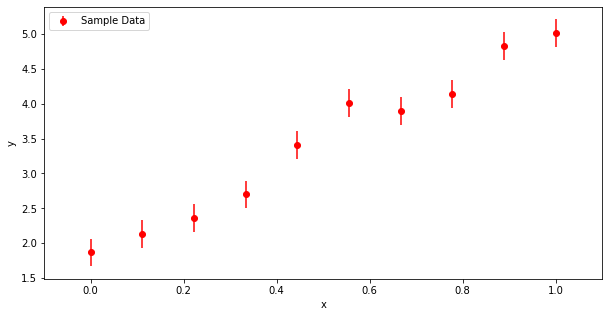

In [0]:
rc('figure',figsize=(10,5))
x = linspace(0,1,10)
sy = 0.2
y = 3*x + 2 + np.random.randn(10)*sy
sigma_y = np.zeros(10) + sy
errorbar(x,y,yerr=sigma_y,fmt='ro', label='Sample Data')
xlim(-0.1,1.1)
xlabel('x')
ylabel('y')
legend(loc='upper left')

Minuit needs a specific format for the function to be fitted (this is called a *signature* - le names and order of the arguments of the function). We will fit a linear function defined in the follwing way:

In [0]:
def line_to_fit(x, pars):
  values = pars[0] + pars[1]*x
  return values

Now let's perform the Minuit fitting that requires an initial guess. Finding the initial guess is sometimes tricky (and can be most of the work actually...) but in the prese3nt case (0,0) will work fine. Here is below to the wrapper to Minuit implemented in the cosmolib library.

In [0]:
guess = np.array([0., 0.])
result = cs.do_minuit(x,y,sigma_y,guess,functname=line_to_fit)

Fitting with Minuit
Chi2= 7.7867859587161075
ndf= 8


Let's analyse the results. The output of minuit can be understood as the following:  returns in a list the fitting function, the value of the fitted parameters, their error bars and the covariance matrix. So here they are:

In [0]:
print(result[0])
print(result[1])
print(result[2])
print(result[3])

[1.7948928  3.27760279]
[0.11755076 0.19817348]
[[ 0.01381818 -0.01963636]
 [-0.01963636  0.03927273]]


So finally we can write the result and error bars as:

In [0]:
for i in range(len(result[1])):
  print('Parameter {0:d} = {1:5.2f} +/- {2:5.2f}'.format(i, result[1][i], result[2][i]))

Parameter 0 =  1.79 +/-  0.12
Parameter 1 =  3.28 +/-  0.20


Which is very consistent with the input values. You can rerun the above lines changing the amount of noise, run it many times to generate multiple realizations...

We show below the initial data along with the fitted straight-line:

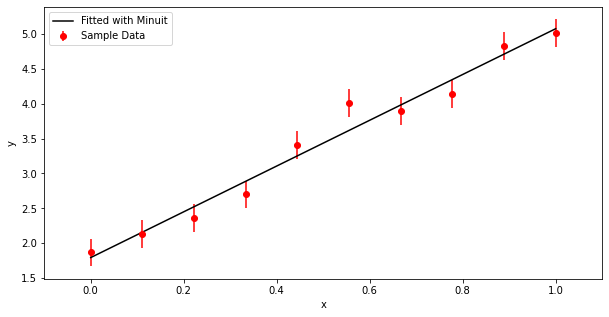

In [0]:
errorbar(x,y,yerr=sigma_y,fmt='ro', label='Sample Data')
plot(x, line_to_fit(x, result[1]),'k', label='Fitted with Minuit')
xlim(-0.1,1.1)
xlabel('x')
ylabel('y')
legend(loc='upper left')

#### SNIa fitting with Minuit
So let's go back to the SNIa. As before, in order to be able to use minuit, the fitting function (the model) nees to be given with a specific *signature* (meaning the name and order of the arguments) in the folowing manner:

In [0]:
def newmusn(x, pars):
    cosmo = {'h':pars[0], 'omega_M_0':pars[1], 
             'omega_lambda_0':pars[2], 'w0':pars[3]}
    val = cs.musn1a(x, cosmo)
    val[isnan(val)] = -1e30
    return val

where pars is therefore an array with the cosmological parameters. Note that in the eventuality that the function cs.musn1a() should return a undefined value (*nan* = "Not a Number") which can happen for some combinations of paramters for which the integral of proper distance does not converge, we replace this *nan* with a stupidly high negative value that will show minuit thiss set of parameters is really bad, but will not generate an error due to the presence of *nan*.

The fitting will need some initial guess, we will choose $$(h=0.7 ; \Omega_m=0.3 ; \Omega_\Lambda=0.7 ; w=-1)$$
We also choose to fix some of the parameters (with the fixpars keyword added in the muniuit call):
- $H_0$ is not constrained at all by SNIa so we fix it
- $w$ can be constrained by SNIa but we choose here not to include it in the analysis as it makes things more complicated. We fix it to -1
So we will fix variables 0 and 3 adding to the minuit call the following *fixpars = [True, False, False, True]*

***Question 4:*** Perform the fit and print the fitted values as above.

We are happy to find the expected 0.28 and 0.72 for $\Omega_m$ and $\Omega_\Lambda$ with a satisfying $\chi^2/ndf$

Have a look at the covariance matrix as well using the index 3 of the returned result from Minuit.

The error bars and covariance matrices are a useful measurement of the confidence intervals, but in the case these are complicated and non gaussian, and particularly when there are a large number of dimensions, this simple fitting approach is a bit limited. It only gives the best-fit value, but we would like to visualize the shape of the confidence intervals in multi-dimensions...

This is where Monte-Carlo-Markov-Chain become useful...

### Fitting with Monte-Carlo-Markov-Chains


#### The Likelihood and the $\chi^2$ (a more rigourous version than above)
We have spoken about the $\chi^2$ and explained in a simple manner its statistical meaning. Actually the $\chi^2$ has a deeper rigourous meaning that we will explain here.

Assume again that we have data $x_i$, $y_i$ for $i$ going from 0 to $N-1$, each with an uncertainty $\sigma_i$. We have a physical model for describing our measurements $y=f(x,\vec{\theta})$ where $\vec{\theta})$ are the parameters of the model (which we want to determine). Each $y_i$ should therefore be randomly drawn from $f(x_i,\vec{\theta})$ with a noise whose statistical distribution will be assumed to be a Gaussian (this is the important hypothesis here).

One can therefore write the following equation for all values of $i$:
$$y_i = f(x_i,\vec{\theta}) - n_i$$
where $n_i$ is a random number with a Gaussian distribution centered on 0 and a variance $\sigma_i$, therefore:
$$P(n_i) = \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left( -\frac{n_i^2}{2\sigma_i^2}\right)$$
which can be rewritten as the probability of measuring our data $d_i=(x_i,y_i)$ given a set of parameters $\vec{\theta}$:
$$P(d_i \mid \vec{\theta}) = \frac{1}{\sqrt{2\pi\sigma_i^2}}\exp\left( -\frac{\left(y_i-f(x_i,\vec{\theta})\right)^2}{2\sigma_i^2}\right)$$

The overall probability of the measurement dataset is the product of all individual probabilities:
$$P(\vec{d} \mid \vec{\theta}) = \prod_{i=0}^{N-1} \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left( -\frac{\left(y_i-f(x_i,\vec{\theta})\right)^2}{2\sigma_i^2}\right)$$
It is then easy to exchange product and exponential, and we rename this probability expressed this way as the **likelihood** of the data and the model:
$$\cal{L}(\vec{d} \mid \vec{\theta}) =  \frac{1}{\prod_{i=0}^{N-1}\sqrt{2\pi\sigma_i^2}} \exp\left( \sum_{i=0}^{N-1}-\frac{\left(y_i-f(x_i,\vec{\theta})\right)^2}{2\sigma_i^2}\right)$$

The best-fit set of parameters $\hat{\vec{\theta}}$ is the one that maximizes this Likelihood $\cal{L}$. It is therefore also the one than minimizes the following quantity:
$$
\begin{eqnarray}
A(\vec{d} \mid \vec{\theta}) &=& -2\log\left(\cal{L(\vec{d} \mid \vec{\theta})}\right)\\
&=& -2\log\left( \frac{1}{\prod_{i=0}^{N-1}\sqrt{2\pi\sigma_i^2}}\right) +\sum_{i=0}^{N-1}\frac{\left(y_i-f(x_i,\vec{\theta})\right)^2}{\sigma_i^2}
\end{eqnarray}$$
The first terms does not depend on the parameters $\vec{\theta}$ and therefore does not play any role in the minimization. The second term is exactly the $\chi^2$ we have used so far. It is therefore perfectly legitimate and rigourous to use the $\chi^2$ method when the error bars are Gaussian:
$$\chi^2(\vec{d} \mid \vec{\theta}) = \sum_{i=0}^{N-1}\frac{\left(y_i-f(x_i,\vec{\theta})\right)^2}{\sigma_i^2}$$

### The Bayes Theorem and the *Posterior Probability*
So far, we have discussed the probability of measuring $\vec{d},\vec{\sigma}_i$ if the parameters are $\vec{\theta}$, this is what is called a Likelihood. Obviously, as a physicist, the quantity we are more interested in is rather the probability that the parameters be $\vec{\theta}$ if the data is $\vec{d},\vec{\sigma}_i$. This latter quantity is known as the **posterior**. The difference between both quantities is expressed through the Bayes Theorem (https://en.wikipedia.org/wiki/Bayes%27_theorem) which states that for two interdependent statistical proposals A and B one has:
$$P(A \mid B) = \frac{P(B\mid A)P(A)}{P(B)}$$
In our case this writes:
$$P(\vec{\theta} \mid \vec{d}) = \frac{P(\vec{d}\mid \vec{\theta})P(\vec{\theta})}{P(\vec{d})}$$
A few important quantities appear here:
- The posterior $P(\vec{\theta} \mid \vec{d})$
- The likelihood $P(\vec{d}\mid \vec{\theta})$
- The probability of the parameters **independently** of any knowledge of the data, which is called the **bayesian prior** $P(\vec{\theta})$
- The probability of the data independently of the model. This one has no particular interest (it does not depend upon the parameters) and simply associated to the global normalisation of our posterior (whose integral needs to be 1).

We therefore have:
$$P(\vec{\theta} \mid \vec{d}) \propto P(\vec{d}\mid \vec{\theta})\times P(\vec{\theta})$$
If the bayesian prior is uniform, then the posterior and the likelihood are equal, otherwise they are different... Note that if one takes a uniform prior for a parameter $a$, this does not correspond to a uniform prior for $a^2$, $\sqrt(a)$ or any function of $a$. As we have no particular reason to think that $a$ is a better parameter than any function of $a$, the bayesian prior seems to be an unavoidable quantity if one wants to talk about the probability of the parameters given the data...

There we dangerously step into the eternal debate between **frequentists** and **bayesians**:
- Frequentists think that there is no scientific legitimity to use a prior, and that it is therefore impossible to write a posterior. They limit themselves to speaking only about the likelihood: the probability of making such a measurement if the parameters are $\vec{\theta}$. They will therefore never talk about the *proabbility of a parameter* which is meanlingless to them. This appraoch is very legitimate in the sense that the physical parameters of our Universe do not seem to have a probability (unless you believe in Muliverse, String Landscape...): they are what they are. The random variables are not the parameters but the measurements.
- Bayesians are undoubtedly less rigourous but think that the target of science is is to answer the question $P(\vec{\theta} \mid \vec{d})$ and not $P(\vec{d}\mid \vec{\theta})$. It is therefore a necessity to chose a prior and talk about posteriors. A scientist therefore needs to manage in such a manner that choice of the prior affects the final result in a minimal manner...

Beyond this deep and legitimate epistemological debate, in most concrete cases it changes nothing: Bayesians will often take results from other experiements as a prior while Frequentists will incorporate these results in their likelihood. Finally they will often find the same confidence intervals which will be directly interpret by Bayesians as the probability density of the parameters. Frequentists will say instead that these confidence intervals are such that they contain the *true value* of the parameters in X% of the experiments one could have done.

This is subtle yet persitant difference and there are sometimes cases where one approach performs better than the other.

In practice, frequentist methods are usually rather complicated to implement when there are many parameters and we want to calculate/visualize the exact shape of the confidence intervals and we want to propagate uncertainties. Monte-Carlo-Markov-Chains methods are fundamentally Bayesian and are easy to implement and make the error propagation straightforward. In most cases, this simplicity argument often turns frequentist physicists into usual bayesians...

### Monte-Carlo-Markov-Chain Methods (MCMC)
A MCMC method aims at directly determining the posterior, in order to do so, one will directly sample the parameter space in order to calculate the posterior on each point.

If one samples the parameter space uniformaly, efficiency is going to be very low: there will be many points sampled in the region where the probability is low (which we care little of) and comparatively few samples in the high posterior regions which we would like to sample well.

The solution is therefore to sample the parameter space in a non-uniform manner and drawing more samples where the posterior is high and less where it is low. Ideally, one would directly sample the parameter space using the posterior, which is equivalent to knowing the solution beforehand...

In fact there exists a magic algorithm known as **Metropolis-Hastings** (from the names of a subset of its inventors in the 50') which directly allows to draw random numbers and end-up with a series of points (a Markov Chain) whose distribution converges asymptotically towards the posterior. It souds like magic but actually works. 

The most amazing thing is maybe thet this algorithm is very simple. here it is:
- start with a random point in parameter space $\vec{\theta}_0$
- draw a new point randomly in parameter space $\vec{\theta}_i$
    - calculate the posterior ratio $a=\frac{P(\vec{\theta}_i \mid \vec{d})}{P(\vec{\theta}_0 \mid \vec{d})}$
        - if $a\geq 1$ then keep the new point $\vec{\theta}_1=\vec{\theta}_i$
        - if $a\lt 1$ then draw a random number uniformly between 0 and 1
            - if this number is smaller than $1-a$ then don;t keep the new point but keep the former one $\vec{\theta}_1=\vec{\theta}_0$
            - otherwise keep the the new point $\vec{\theta}_1=\vec{\theta}_i$
- then start over with drawing a new $\vec{\theta}_i$

This way one constructs a series of parameters sets  $\vec{\theta}_i$ for $i$ between 0 and $N_{samples}$ which will have the following properties:
- it is a Markov Chain: ($\vec{\theta}_i$ only depends upon its predecessor $\vec{\theta}_{i-1}$)
- it samples the posterior $P$, meaning that the density of points in the chain in the parameter space is porportional to $P(\vec{\theta} \mid \vec{d})$. We therefore directly obtain the shape and statistics of the posterior by looking at the spatial distribution of the points in the chain.

Let's show how it works on a simple example with a simplistic (although correct) implementation of Metropolis-Hastings. We define a Gaussian posterior which we chose to be centered on 2 with a variance equal to 3. We then use our Metropolis-Hastings algorithm with a 10000 elements chain. Ideally we should reject the first part of the chain that takes some time to "start" (this is called the "Burn out") but we will not do it here in order to remain simple.

In [0]:
#### Define the posterior (we cheat here, in general its shape 
#### is not known, we need to calculate it at each step in a 
#### complicated and CPU consuming manner)
def like(x):
    return 1./(np.sqrt(2*np.pi)*3) * exp(-0.5*(x-2.)**2/3.**2)

#### IInitialize the chain
nbtot = 10000
chain = np.zeros(nbtot)
init = 10.

#### Run the Metropolis Hastings just as a python 
#### transcription of the above
#### The jump to the next element is made in a wide manner with a random
#### number uniformly between -15 and 15
nok = 0
while nok < nbtot:
    pini = like(init)
    new = init + np.random.rand(1)*30-15
    pnew = like(new)
    a = pnew/pini
    #print(a)
    if (a>=1):
        chain[nok] = new
        init = new
        nok += 1
    else:
        rd = np.random.rand(1)
        if (rd < (1-a)):
            #print('ok')
            chain[nok] = init
            init = init
            nok += 1  
        else:
            chain[nok] = new
            init = new
            nok += 1
        
print(chain)

[10.         10.          7.72407952 ...  6.27188091  2.16162309
  0.14129532]


Now let's just plot the histogram of the sampled values along with the shape of the posterior that we assumed at the beginning:

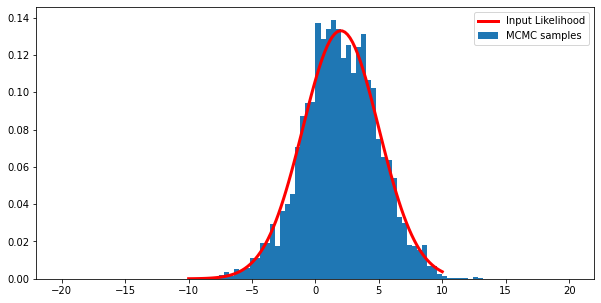

In [0]:
bla=hist(chain, bins=100,range=[-20,20], density=True, label='MCMC samples')
xx=linspace(-10,10,100)
plot(xx,like(xx),'r-',lw=3, label='Input Likelihood')
legend()

not bad eh !!!

You can try to run it with more elements to see the convergence improving.

The above example may seem a bit stupid in the sens that we knew the formula of the posterior beforehand... Here the Gaussian. However in most realistic cases, the value of the posterior in one point of the parameter space has no analysitcal expression and we need to calculate it in a complicated manner than is usally very greedy in terms of CPU. The Metropolis-Hastings allow to very efficiently sample the parameter space with a minimum number of calls to the posterior function.

#### Example of a straight-line fit
Let's take the example of a fit of a straight-line in order to go further in our understanding of the method. It will also be the occasion of using a more efficient and robust version of the Metropolis-Hastings algorithm that I have prepared in the library cosmoOUlib.py relying the pymc library (https://pymc-devs.github.io/pymc/).

We draw the following points according to a linear law which we will want ot fit:

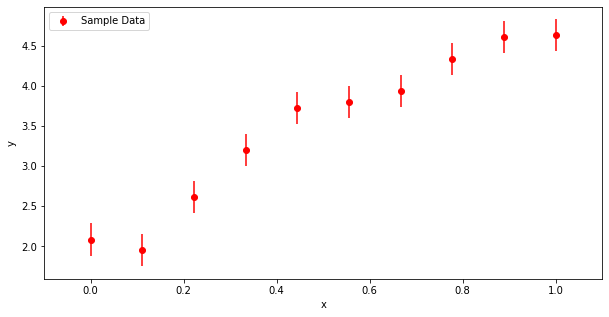

In [0]:
rc('figure',figsize=(10,5))
x = linspace(0,1,10)
sy = 0.2
y = 3*x + 2 + np.random.randn(10)*sy
sigma_y = np.zeros(10) + sy
errorbar(x,y,yerr=sigma_y,fmt='ro', label='Sample Data')
xlim(-0.1,1.1)
xlabel('x')
ylabel('y')
legend(loc='upper left')

The function we will adjust is given below. We also prepare a variable called 'data' that contains the data x,y and errors as well as the model we want to fit. This is done using a function called Data() defined in cosmolib.py (have a look at the code !):

In [0]:
def fonction(x, par):
    return par[0] + par[1]*x

data = cs.Data(xvals=x, yvals=y, errors=sigma_y, model=fonction)

We now run the MCMC exploration using again a function from cosmolib.py called run_mcmc() preising that the likelihood model one will take in this case is the generic one called 'll_model_generic':

In [0]:
chain = cs.run_mcmc(data, allvariables=['p0', 'p1'])

 [-----------------100%-----------------] 80000 of 80000 complete in 5.9 sec

And we now plot the elements of the chain:

Text(0, 0.5, 'p1')

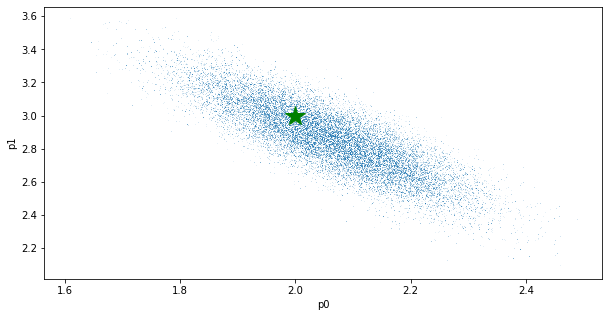

In [0]:
plot(chain['p0'], chain['p1'], ',', alpha=0.1)
plot(2,3,'g*', label='True Value',ms=20)
xlabel('p0')
ylabel('p1')

We see that the distribution of the points nicely contains the true value. Now we want to interpret the MCMC chain in terms of confidence intervals.

First important thing here: the notion of marginalization. One says that he marginalizes over a variable when one has a probability that depends upon many variables and we look at the probability reduced to a subset of the variables by integrating over the marginalized ones. Here we marginalize over $b$:
$$P(a) = \int P(a,b) \mathrm{d}b$$
With a frequentist approach to probabilities (typically when using Minuit) such a marginalization involves a very complex procedure in order to explicitly calculate this integral.

On the contrary, with a Bayesian MCMC approach, integrating over dimension $b$ reduces to just tracing the histogram of all dimensions of the chain except $b$. We can easly show the individual probabilities of all of our variables when marginalized over all the other ones, and we can calculate confidence intervals for each individual variable marginalized over the others.

In our straight-line fitting example:


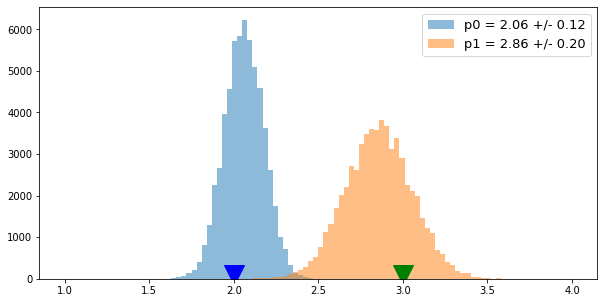

In [0]:
mp0 = np.mean(chain['p0'])
mp1 = np.mean(chain['p1'])
sp0 = np.std(chain['p0'])
sp1 = np.std(chain['p1'])
aa=hist(chain['p0'], bins=100, range=[1,4], alpha=0.5, label='p0 = {0:3.2f} +/- {1:3.2f}'.format(mp0, sp0))
bb=hist(chain['p1'], bins=100, range=[1,4], alpha=0.5, label='p1 = {0:3.2f} +/- {1:3.2f}'.format(mp1, sp1))
plot(2,100,'bv',ms=20)
plot(3,100,'gv',ms=20)
legend(fontsize=13)

The blue and green triangles show the True Values.

Now regarding the N-dimensional confidence intervals, they are for sure impossible to draw on a screen, we therefore usually show 2-D plots af all pairs of variables, marginalizing over the others. In our example there is only one 2-D plot which we show through a 2-D histogram (we overplot in red the true input values):

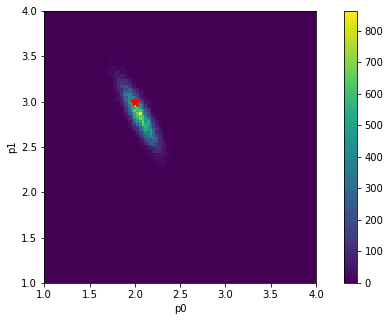

In [0]:
im2d = hist2d(chain['p0'], chain['p1'], bins=100, 
              range=[[1,4],[1,4]])
imshow(im2d[0].T, interpolation='nearest', origin='lower', 
       extent = (0,5,0,5))
colorbar()
xlabel('p0')
ylabel('p1')
plot(2,3,'r*', label='True Value',ms=10)


Finally MCMC results are often represented as a kind of matrix of plots with all the 2-D and 1-D posteriors smoothed for a nice appearence. The 2-D histograms are also replaced by 2-D contours that show various confidence intervals (exemple 68 and 95% Confidence Levels). The function matrixplot() in the cosmolib.py does that for you !

/content/cosmolib.py:326: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
/content/cosmolib.py:326: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previ

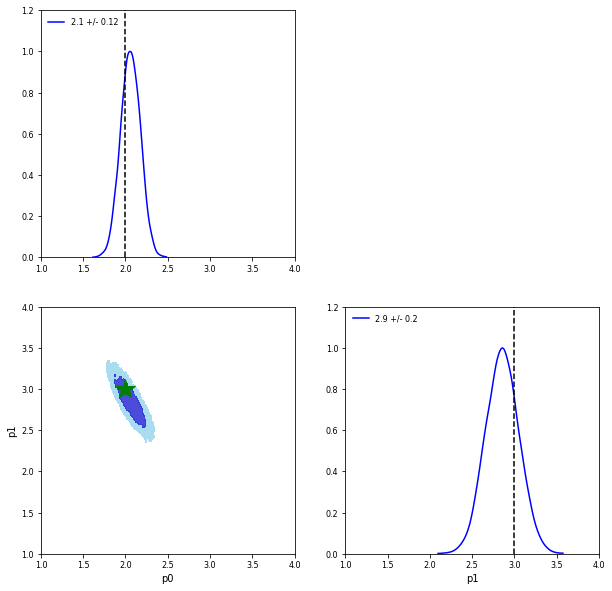

In [0]:
rc('figure',figsize=(10,10))
sm = 1.5   #smoothing parameter - to be adjusted not to change the shape
cs.matrixplot(chain, ['p0', 'p1'], 'blue', sm, 
              limits = [[1,4], [1,4]], labels=['p0','p1'])

#### Overplot the True Values
subplot(2,2,1)
plot([2,2], [0,2], 'k--')
subplot(2,2,4)
plot([3,3], [0,2], 'k--')
subplot(2,2,3)
plot(2,3,'g*', label='True Value',ms=20)


By rerunning the drawing of the noise for the straight-line, and rerunning the rest, you will see how different realizations move with respect to the True points.

#### A bit more advanced:
We could have specified a more general model for fitting, for instance a 4th order polynomial, and fit only the first two parameters. This can be easily done with the provided MCMC functions:

 [-----------------100%-----------------] 80000 of 80000 complete in 7.1 sec

/content/cosmolib.py:326: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
/content/cosmolib.py:326: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a prev

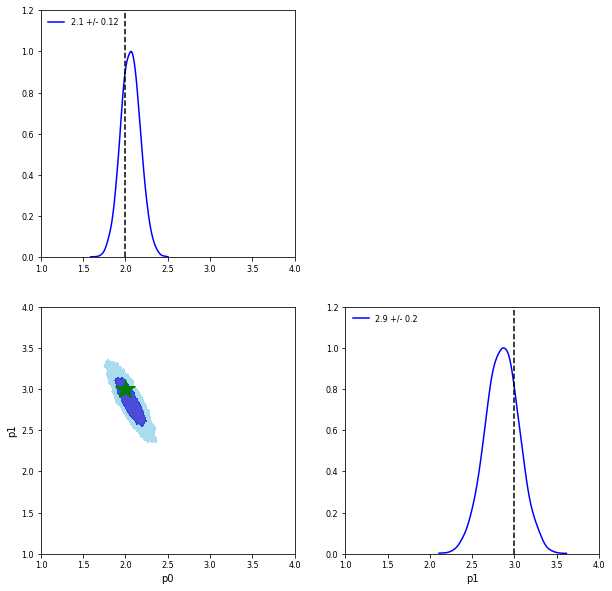

In [0]:
def fonction(x, par):
    return par[0] + par[1]*x + par[2]*x**2 + par[3]*x**3 + par[4]*x**4

data = cs.Data(xvals=x, yvals=y, errors=sigma_y, model=fonction)
chain = cs.run_mcmc(data, allvariables=['p0', 'p1', 'p2', 'p3', 'p4', 'p5'],
                   fitvariables=['p0', 'p1'])

sm = 1.5   #smoothing parameter - to be adjusted not to change the shape
cs.matrixplot(chain, ['p0', 'p1'], 'blue', sm, 
              limits = [[1,4], [1,4]], labels=['p0','p1'])

#### Overplot the True Values
subplot(2,2,1)
plot([2,2], [0,2], 'k--')
subplot(2,2,4)
plot([3,3], [0,2], 'k--')
subplot(2,2,3)
plot(2,3,'g*', label='True Value',ms=20)

Here we have not specified anything regarding the value of the unfitted parameters, so the code automatically sets them to zero. We could have decided to fix them to another value through the *fidvalue* keyword which should have therefore contained a nympy.array with the fiduciual values for all the parameters listed in the allvariables.

#### MCMC on SNIa data
***Question 5:*** Now perform the MCMC fitting on the supernovae data for the $\Lambda CDM$ model with variables $\Omega_m$ and $\Omega_\Lambda$ (we won't look at $w$ and remember that supernovae do not constrain the Hubble constant so these two should not be fitted but fixed to respectively -1 and 0.7 as fiducial values).
You should then display the matrix plot of the contours.

# You have just won the Nobel Prize in Physics 2011
https://www.nobelprize.org/prizes/physics/2011/summary/

just a bit too late...

# Going further
For those of you willing to go further it is interesting to investigate the constraints imposed by SNIa data on the Dark Energy equation of state $w_0$. In order to do so, you may first explore with a MCMC the three parameters jointly ($\Omega_m, \Omega_\Lambda,w_0$) but you will soon realize how degenerate they are with each other using only SNIa data. This is why adding other probes like Baryonic Acoustic Oscillations and the Cosmic Microwave Background is so powerful: it breaks these degeneracies as these probes are differently sensitive to cosmological parameters with respect to SNIa. A simpler way of investigating this is to explore only $(\Omega_m, w_0$) while forcing the curvature to be zero (as observationnally suggested by the CMB alone as well as prefferred from a theoretical point of view) through $\Omega_\Lambda = 1-\Omega_m$. You will therefore see that the SNIa data is consistent with $w_0=-1$, that is to say a simple cosmological constant.

You will go much further during the Integration Week by combining different cosmological probes and breaking these degeneracies in a rigourous manner.